In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from umap import UMAP
from sklearn.manifold import TSNE

2022-10-19 00:26:51.825884: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-19 00:26:52.078214: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-10-19 00:26:52.708327: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/fangtian/miniconda3/envs/ann/lib/
2022-10-19 00:26:52.708387: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_pl

In [2]:
u = np.load("./part1/UM/Setting_5_U_1.npy")
m = np.load("./part1/UM/Setting_5_M_1.npy")
m = np.matrix(m)
m = m.T
u.shape

(6040, 10)

In [3]:
users = pd.read_table("./part1/ml-1m/users.dat", sep="::", names=["UserID", "Gender", "Age", "Occupation", "Zip-code"], engine="python")
movies = pd.read_table("./part1/ml-1m/movies.dat", sep="::", names=["MovieID", "Title", "Genres"], engine="python", encoding = "ISO-8859-1")
occupation = users["Occupation"].to_numpy()
gender = users["Gender"].to_list()
gender = [g == "F" for g in gender]
genres = movies["Genres"].to_numpy()
users

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455
...,...,...,...,...,...
6035,6036,F,25,15,32603
6036,6037,F,45,1,76006
6037,6038,F,56,1,14706
6038,6039,F,45,0,01060


In [10]:
u_standard = (u - np.mean(u)) / np.std(u)

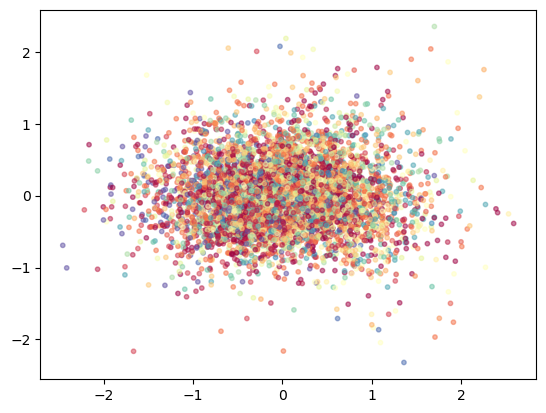

In [12]:
pca_model = PCA(n_components=2)
u_pca=pca_model.fit_transform(u_standard)
plt.scatter(u_pca[:,0], u_pca[:,1], c=occupation, alpha=0.5, cmap='Spectral',s=10)

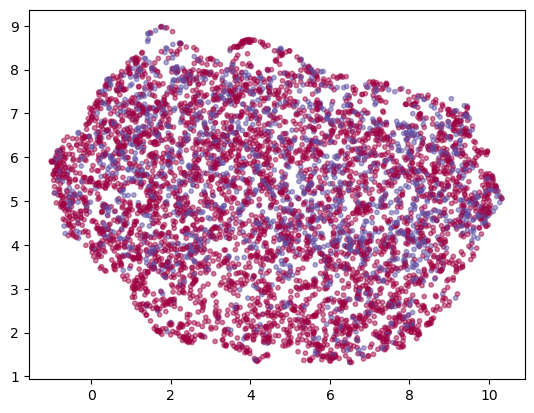

In [5]:
umap_model = UMAP(n_neighbors=5, n_components=2)
u_umap = umap_model.fit_transform(u)
plt.scatter(u_umap[:,0], u_umap[:,-1], c=gender, alpha=0.5, cmap='Spectral',s=10)

/home/fangtian/miniconda3/envs/ann/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/fangtian/miniconda3/envs/ann/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


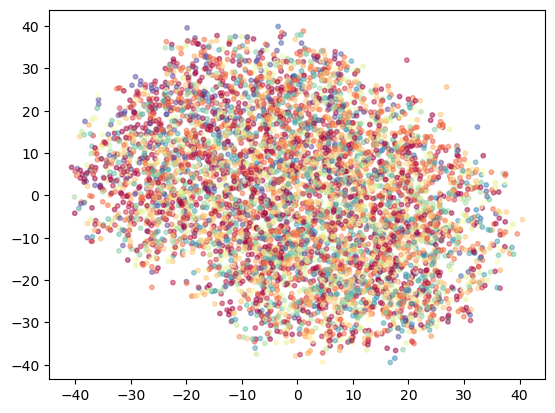

In [6]:
tsne_model = TSNE(n_components=3)
u_tsne = tsne_model.fit_transform(u)
plt.scatter(u_tsne[:,0], u_tsne[:,1], c=occupation, alpha=0.5, cmap='Spectral',s=10)

In [7]:
u_tsne

array([[  1.7824771, -33.035904 , -14.815015 ],
       [  6.3013625, -17.29171  ,   1.0675392],
       [ 15.65172  ,  -6.480515 , -17.982721 ],
       ...,
       [  7.4826665,   2.434285 ,   8.605465 ],
       [  8.70191  ,  -6.09895  ,   8.005491 ],
       [-27.735937 ,  23.937822 ,   7.564413 ]], dtype=float32)